# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.282483e+01     1.266620e+01
 * time: 0.004846096038818359
     1     6.192261e+01     1.300328e+01
 * time: 0.013833045959472656
     2     5.544824e+01     1.495307e+01
 * time: 0.035286903381347656
     3     4.028751e+01     9.660589e+00
 * time: 0.0654139518737793
     4     3.017914e+01     6.911409e+00
 * time: 0.09537196159362793
     5     2.623299e+01     5.583217e+00
 * time: 0.12092995643615723
     6     1.231947e+01     1.806976e+00
 * time: 0.14713811874389648
     7     1.120186e+01     4.384324e+00
 * time: 0.16497492790222168
     8     1.021391e+01     2.761262e+00
 * time: 0.18688106536865234
     9     9.401671e+00     2.710057e+00
 * time: 0.269927978515625
    10     8.110089e+00     2.035873e+00
 * time: 0.2917599678039551
    11     7.514788e+00     1.592216e+00
 * time: 0.3135700225830078
    12     7.133234e+00     2.672977e+00
 * time: 0.3315730094909668
    13     6.943149e+00     1.970157e+00
 * time: 0.

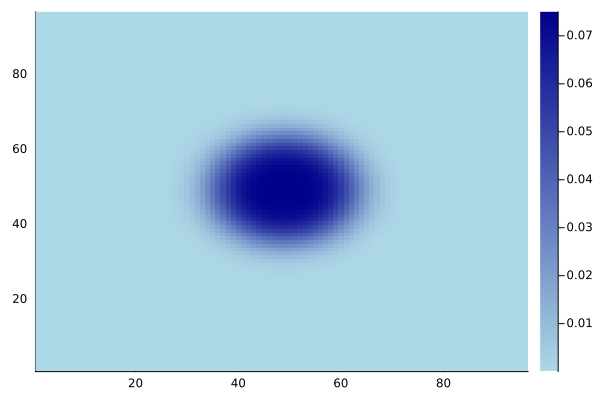

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)